In [66]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv('ams27.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [68]:
len(df)

18502

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18502 entries, 0 to 18501
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18502 non-null  int64  
 1   N_Person           18502 non-null  int64  
 2   Xcenter            18502 non-null  float64
 3   Ycenter            18502 non-null  float64
 4   PerXmin            18502 non-null  float64
 5   PerYmin            18502 non-null  float64
 6   PerXmax            18502 non-null  float64
 7   PerYmax            18502 non-null  float64
 8   N_Handgun          18502 non-null  int64  
 9   HgXcenter          18502 non-null  float64
 10  HgYcenter          18502 non-null  float64
 11  HgXmin             18502 non-null  float64
 12  HgYmin             18502 non-null  float64
 13  HgXmax             18502 non-null  float64
 14  HgYmax             18502 non-null  float64
 15  Intersection       18502 non-null  object 
 16  Included_Center    185

In [70]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14254
Ycenter              14235
PerXmin              14262
PerYmin              14259
PerXmax              14262
PerYmax              14239
N_Handgun                5
HgXcenter             7303
HgYcenter             7301
HgXmin                7305
HgYmin                7305
HgXmax                7305
HgYmax                7304
Intersection             9
Included_Center          2
Intersection_Area     8473
Hg_Area               7305
Distance             18502
Ground_Truth             3
GT                       3
dtype: int64

In [71]:
df['Ground_Truth'].value_counts()

0    15109
1     2666
2      727
Name: Ground_Truth, dtype: int64

In [72]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18502 entries, 0 to 18501
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18502 non-null  int64  
 1   N_Person                      18502 non-null  int64  
 2   Xcenter                       18502 non-null  float64
 3   Ycenter                       18502 non-null  float64
 4   PerXmin                       18502 non-null  float64
 5   PerYmin                       18502 non-null  float64
 6   PerXmax                       18502 non-null  float64
 7   PerYmax                       18502 non-null  float64
 8   N_Handgun                     18502 non-null  int64  
 9   HgXcenter                     18502 non-null  float64
 10  HgYcenter                     18502 non-null  float64
 11  HgXmin                        18502 non-null  float64
 12  HgYmin                        18502 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [74]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 0: 'MLP', 2: 'SVM'}


In [75]:
print(df2['Ground_Truth'].value_counts())

0    15109
1     2666
2      727
Name: Ground_Truth, dtype: int64


In [76]:
df3 = df2.drop(columns=["GT"])

In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18502 entries, 0 to 18501
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18502 non-null  int64  
 1   N_Person                      18502 non-null  int64  
 2   Xcenter                       18502 non-null  float64
 3   Ycenter                       18502 non-null  float64
 4   PerXmin                       18502 non-null  float64
 5   PerYmin                       18502 non-null  float64
 6   PerXmax                       18502 non-null  float64
 7   PerYmax                       18502 non-null  float64
 8   N_Handgun                     18502 non-null  int64  
 9   HgXcenter                     18502 non-null  float64
 10  HgYcenter                     18502 non-null  float64
 11  HgXmin                        18502 non-null  float64
 12  HgYmin                        18502 non-null  float64
 13  H

In [78]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14801, 28) (14801,)
(3701, 28) (3701,)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8897896612925514
mean_test =  0.8880491176524261


,fit_time,score_time,test_score,train_score
0,0.096775,0.002989,0.873059,0.880781
1,0.098766,0.003944,0.892568,0.895503
2,0.114694,0.004032,0.890541,0.893176
3,0.105745,0.005938,0.893919,0.891375
4,0.112325,0.004961,0.888514,0.891750
5,0.112456,0.007204,0.879054,0.887846
6,0.102192,0.003074,0.901351,0.894377
7,0.107743,0.004991,0.890541,0.889498
8,0.109975,0.003989,0.891892,0.885894
9,0.113046,0.003994,0.879054,0.887696


                         feature  importance       std
1                       N_Person    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
13                        HgXmax    0.001364  0.003511
27         Intersection_Up_right    0.003311  0.009932
15               Included_Center    0.003387  0.010160
25        Intersection_Up_center    0.004803  0.014410
11                        HgXmin    0.005159  0.015220
23           Intersection_Inside    0.006047  0.014928
8                      N_Handgun    0.008495  0.025484
14                        HgYmax    0.011146  0.018426
17                       Hg_Area    0.012006  0.024354
5                        PerYmin    0.013440  0.035777
3                        Ycenter    0.015208  0.035737
20     Intersection_Center_right    0.016334  0.036035
4                        PerXmin    0.019344  0.036582
6         

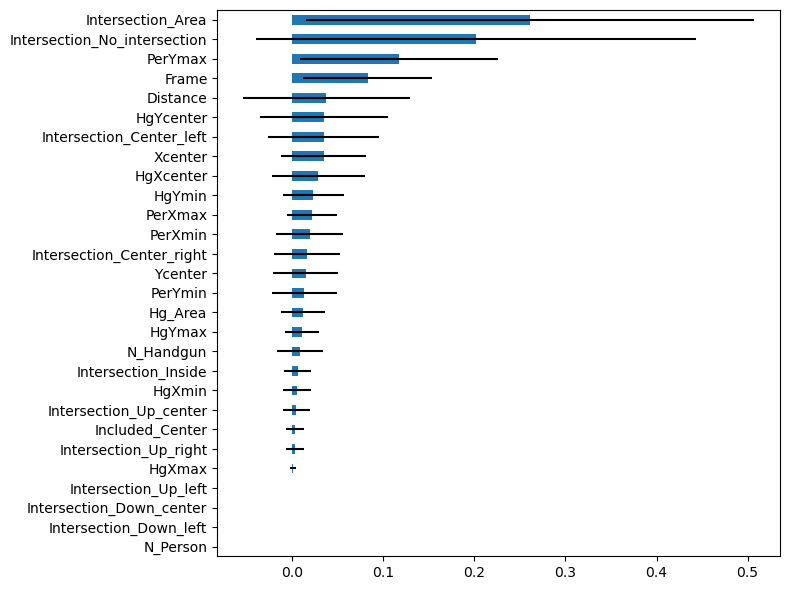

In [83]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2993
           1       0.86      0.45      0.59       554
           2       0.00      0.00      0.00       154

    accuracy                           0.87      3701
   macro avg       0.58      0.48      0.51      3701
weighted avg       0.83      0.87      0.84      3701



C:\Users\ALONSO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ALONSO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ALONSO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions))

Score train =  0.8697649283977303


In [86]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

C:\Users\ALONSO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5753926613357057

In [87]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.48010098171304644

In [88]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.5051784380417846

In [20]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [21]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18502 entries, 0 to 18501
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18502 non-null  int64  
 1   N_Person                      18502 non-null  int64  
 2   Xcenter                       18502 non-null  float64
 3   Ycenter                       18502 non-null  float64
 4   PerXmin                       18502 non-null  float64
 5   PerYmin                       18502 non-null  float64
 6   PerXmax                       18502 non-null  float64
 7   PerYmax                       18502 non-null  float64
 8   N_Handgun                     18502 non-null  int64  
 9   HgXcenter                     18502 non-null  float64
 10  HgYcenter                     18502 non-null  float64
 11  HgXmin                        18502 non-null  float64
 12  HgYmin                        18502 non-null  float64
 13  H

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86287246, -1.00658199,  0.38706261, -1.05768944,  0.40800638,
        -0.80168342,  0.35049427, -1.42445412, -0.49678154,  0.64920141,
        -1.25742491,  0.70172539, -1.17650671,  0.59525976, -1.33367325,
         1.17786028, -0.049153  , -0.63124782, -0.69620282,  2.66671233,
        -0.28378681, -0.01644123, -0.0103975 , -0.53856956, -1.0840528 ,
        -0.11985005, -0.06162583, -0.13825047],
       [-1.8607042 , -1.00658199,  0.38677696, -1.05709931,  0.40702436,
        -0.79999411,  0.35093971, -1.42719866, -0.49678154,  0.64760513,
        -1.25827866,  0.69872182, -1.17715774,  0.59505862, -1.33473163,
         1.17786028, -0.0467285 , -0.62533114, -0.69477461,  2.66671233,
        -0.28378681, -0.01644123, -0.0103975 , -0.53856956, -1.0840528 ,
        -0.11985005, -0.06162583, -0.13825047],
       [-1.85853595, -1.00658199,  0.3873973 , -1.05925233,  0.40849316,
        -0.80404914,  0.3506588 , -1.42319321, -0.49678154,  0.64742642,
        -1.25969217,  0.6986

In [24]:
print(scaler.mean_)

[8.59156794e+02 8.79580586e-01 3.92872480e+02 3.82384260e+02
 3.05658233e+02 2.46085701e+02 4.80086727e+02 5.18682818e+02
 2.98400173e-01 3.10665370e+02 3.12348658e+02 2.87309904e+02
 2.92817722e+02 3.34020837e+02 3.31879595e+02 4.18873635e-01
 9.26579969e+02 2.02154523e+03 2.31828991e+02 1.23283969e-01
 7.45324830e-02 2.70241055e-04 1.08096422e-04 2.24840558e-01
 5.40265917e-01 1.41606313e-02 3.78337477e-03 1.87547292e-02]


In [25]:
print(scaler.scale_)

[4.61200009e+02 8.73829051e-01 2.12180070e+02 6.88305187e+01
 2.19896115e+02 1.11868318e+02 2.12656612e+02 3.92568978e+01
 6.00666794e-01 1.52828715e+02 9.72628259e+01 1.52131404e+02
 9.91937777e+01 1.54014725e+02 9.58999926e+01 4.93374617e-01
 1.66123687e+03 1.80600545e+03 1.37471575e+02 3.28762881e-01
 2.62635474e-01 1.64367888e-02 1.03963810e-02 4.17477282e-01
 4.98376019e-01 1.18152900e-01 6.13926775e-02 1.35657618e-01]


In [26]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [27]:
X_train.shape

(13876, 28)

In [28]:
y_train.value_counts()

0    11331
1     2000
2      545
Name: Ground_Truth, dtype: int64

In [29]:
X_test.shape

(4626, 28)

In [30]:
y_test.value_counts()

0    3778
1     666
2     182
Name: Ground_Truth, dtype: int64

In [31]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[1.00000000e+00, 1.01515261e-18, 1.76427320e-30],
       [1.00000000e+00, 1.50404836e-40, 7.59121328e-64],
       [1.27121678e-07, 9.99999873e-01, 4.95946197e-13],
       ...,
       [1.00000000e+00, 7.80035046e-14, 2.02517707e-23],
       [5.22449379e-06, 9.99980322e-01, 1.44533061e-05],
       [9.35482672e-01, 6.44957475e-02, 2.15810146e-05]])

In [32]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3778
           1       0.97      0.94      0.96       666
           2       0.97      0.91      0.94       182

    accuracy                           0.99      4626
   macro avg       0.98      0.95      0.96      4626
weighted avg       0.99      0.99      0.99      4626



In [35]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9920726434130873
Score test =  0.9859489840034588


In [42]:
from sklearn.metrics import accuracy_score
print("Score train = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.9859489840034588


In [43]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9764066120275271

In [44]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.9489631488043346

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9622562935702407

In [36]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 